# Naive Bayes Project

**Naive sentiment analysis**

This is a simple project using Naive Bayes Classifier and Scikit-learn to create a Google Play store reviews classifier (Sentiment Analysis) in Python. It will categorize user reviews as good or bad. In this dataset, it would be used the 23 most popular mobile apps, and only two columns.

## Importing Libraries

In [1]:
### Load libraries and modules ###
# Dataframes and matrices ----------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline
# Metrics --------------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Loading the dataset

In [2]:
# Loading the dataset
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews_dataset.csv')
# Create a copy of the original dataset
df = df_raw.copy()

## Data Exploration



Data Dictionary:


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [4]:
df_raw.sample(10)

,package_name,review,polarity
672,com.hamrokeyboard,not for me i thought its better than multi la...,0
670,com.hamrokeyboard,auto capitalization needed. it doesn't automa...,0
776,org.mozilla.firefox,shab i have firefox on all of my devices and ...,0
667,com.hamrokeyboard,fix some things one letter is capitalized and...,0
631,com.uc.browser.en,fast on slow phones this seems to be the fast...,1
679,com.hamrokeyboard,hamro keyboard this is good app no doubt abou...,1
663,com.hamrokeyboard,"good app and nice try dear, developers great ...",1
654,com.uc.browser.en,very smooth i'd say it's much better than jus...,1
701,com.opera.mini.native,still the best mini i like the new look and n...,1
379,com.google.android.talk,i can't send messages because in my settings...,0


## Preprocess of the data

Preprocess of the data by eliminating the package_name column and putting all reviews in lower case.

In [5]:
# Remove package name as it's not relevant
df = df.drop('package_name', axis=1)

# Convert text to lowercase
df['review'] = df['review'].str.strip().str.lower()

In [6]:
df.head(5)

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


## Construction of the model and results

In [7]:
#Separate predictor from target
X = df['review']
y = df['polarity']

In [8]:
# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623,) (268,) (623,) (268,)


### Multinomial Naïve Bayes

In [9]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
X_train_t = vec.fit_transform(X_train).toarray()
X_test_t = vec.transform(X_test).toarray()

In [10]:
mnb =  MultinomialNB()
mnb.fit(X_train_t, y_train)

MultinomialNB()

In [11]:
y_pred_mnb = mnb.predict(X_test_t)

#### Prediction

In [12]:
mnb.predict(vec.transform(['Love this app simply awesome!']))

array([1])

#### Model Evaluation

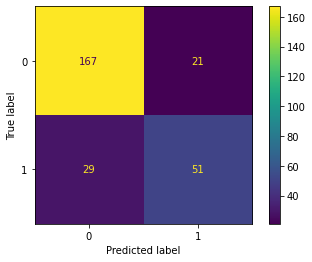



              precision    recall  f1-score   support

           0       0.85      0.89      0.87       188
           1       0.71      0.64      0.67        80

    accuracy                           0.81       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.81      0.81      0.81       268



Multinomial Naive Bayes Mean absolute error: 0.1865671641791045


Multinomial Naive Bayes Train Accuracy =  0.9662921348314607
Multinomial Naive Bayes Test Accuracy =  0.8134328358208955


Multinomial Naive Bayes Precision score: 0.7083333333333334


Multinomial Naive Bayes Recall score: 0.6375


In [13]:
cm = confusion_matrix(y_test, y_pred_mnb, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mnb.classes_)
disp.plot()
plt.show()
print("\n")
print(classification_report(y_test,y_pred_mnb))
print("\n")
print("Multinomial Naive Bayes Mean absolute error:", mean_absolute_error(y_test, y_pred_mnb))
print("\n")
print('Multinomial Naive Bayes Train Accuracy = ',accuracy_score(y_train,mnb.predict(X_train_t)))
print('Multinomial Naive Bayes Test Accuracy = ',accuracy_score(y_test,mnb.predict(X_test_t)))
print("\n")
print("Multinomial Naive Bayes Precision score:",precision_score(y_test, y_pred_mnb))
print("\n")
print("Multinomial Naive Bayes Recall score:",recall_score(y_test, y_pred_mnb))

### Gaussian Naïve Bayes

In [14]:
gnb = GaussianNB()
gnb.fit(X_train_t, y_train)

GaussianNB()

In [15]:
y_pred_gnb = gnb.predict(X_test_t)

#### Model Evaluation

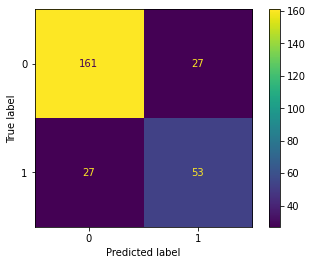



              precision    recall  f1-score   support

           0       0.86      0.86      0.86       188
           1       0.66      0.66      0.66        80

    accuracy                           0.80       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.80      0.80      0.80       268



Gaussian Naive Bayes Mean absolute error: 0.20149253731343283


Gaussian Naive Bayes Train Accuracy =  0.985553772070626
Gaussian Naive Bayes Test Accuracy =  0.7985074626865671


Gaussian Naive Bayes Precision score: 0.6625


Gaussian Naive Bayes Recall score: 0.6625


In [16]:
cm = confusion_matrix(y_test, y_pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=gnb.classes_)
disp.plot()
plt.show()
print("\n")
print(classification_report(y_test,y_pred_gnb))
print("\n")
print("Gaussian Naive Bayes Mean absolute error:", mean_absolute_error(y_test, y_pred_gnb))
print("\n")
print('Gaussian Naive Bayes Train Accuracy = ',accuracy_score(y_train,gnb.predict(X_train_t)))
print('Gaussian Naive Bayes Test Accuracy = ',accuracy_score(y_test,gnb.predict(X_test_t)))
print("\n")
print("Gaussian Naive Bayes Precision score:",precision_score(y_test, y_pred_gnb))
print("\n")
print("Gaussian Naive Bayes Recall score:",recall_score(y_test, y_pred_gnb))

### Multinomial Naive Bayes using CountVectorizer and TfidfTransformer as preprocessing steps

In [17]:
# Create a pipeline with the two preprocessing steps and the modeling step with the algorithm chosen
mnb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
mnb_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [18]:
y_pred_clf = mnb_clf.predict(X_test)

#### Model Evaluation

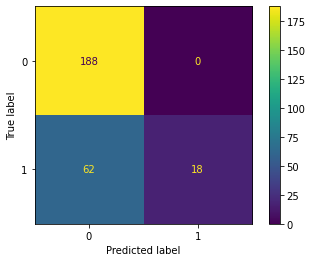



              precision    recall  f1-score   support

           0       0.75      1.00      0.86       188
           1       1.00      0.23      0.37        80

    accuracy                           0.77       268
   macro avg       0.88      0.61      0.61       268
weighted avg       0.83      0.77      0.71       268



Mean absolute error: 0.23134328358208955


Train Accuracy =  0.8154093097913323
Test Accuracy =  0.7686567164179104


Precision score: 1.0


Recall score: 0.225


In [19]:
cm = confusion_matrix(y_test, y_pred_clf, labels=mnb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mnb_clf.classes_)
disp.plot()
plt.show()
print("\n")
print(classification_report(y_test,y_pred_clf))
print("\n")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred_clf))
print("\n")
print('Train Accuracy = ',accuracy_score(y_train,mnb_clf.predict(X_train)))
print('Test Accuracy = ',accuracy_score(y_test,mnb_clf.predict(X_test)))
print("\n")
print("Precision score:",precision_score(y_test, y_pred_clf))
print("\n")
print("Recall score:",recall_score(y_test, y_pred_clf))